# Assignment-3

**Due Date:** 14.12.2022 

---------------------------------------

**Instructor:** Erkut Erdem

**TA:** Sibel Kapan

---------------------------------------
**Student Name Surname**: Melike Nur DULKADİR
**Student ID**: 21992919

**Github Classroom:** https://classroom.github.com/a/Wv6S7qnL



## Part I: Theory Questions

Write your answers. You can add a picture or write it as a markdown.

**1.** Consider the convolutional neural network defined by the layers in the left column below. Fill in the shape of the output volume and the number of parameters at each layer. You can write the shapes in the numpy format (e.g. (64,64,3))
• CONV3-10 denotes a convolutional layer with 10 filter with 3x3 size. Padding is
0, and stride is 2.
• POOL-2 denotes a 2x2 max-pooling layer and stride is 2.
• FC-20 denotes a fully-connected layer with 20 neurons.
• FC-10 denotes a fully-connected layer with 10 neurons.

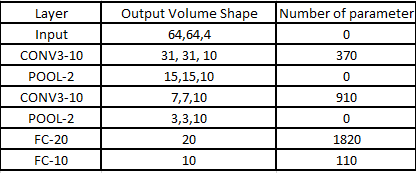

In [1]:
from IPython.display import Image
Image(filename='q1.PNG')

In [2]:
#!pip install tensorflow

I used the following tensorflow code while creating this table.

In [68]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(10, kernel_size=3, activation='relu', strides=2, input_shape=(64,64,4)))
model.add(keras.layers.MaxPooling2D((2,2),strides=2,input_shape=(31,31,10)))
model.add(keras.layers.Conv2D(10, kernel_size=3, activation='relu', strides=2, input_shape=(15,15,10)))
model.add(keras.layers.MaxPooling2D((2,2),strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 31, 31, 10)        370       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 10)          910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 10)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 90)                0         
                                                                 
 dense_2 (Dense)             (None, 20)               

**2.** Consider the simple neuron structure below:

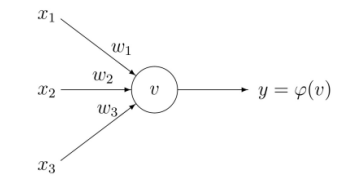

In [4]:
Image(filename='q2.PNG')

Assume that the weights for the neuron are w1 = 3, w2 = 5, and w3 = 2 with activation function below:

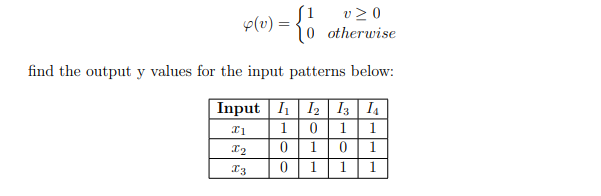

In [5]:
Image(filename='q2.2.PNG')

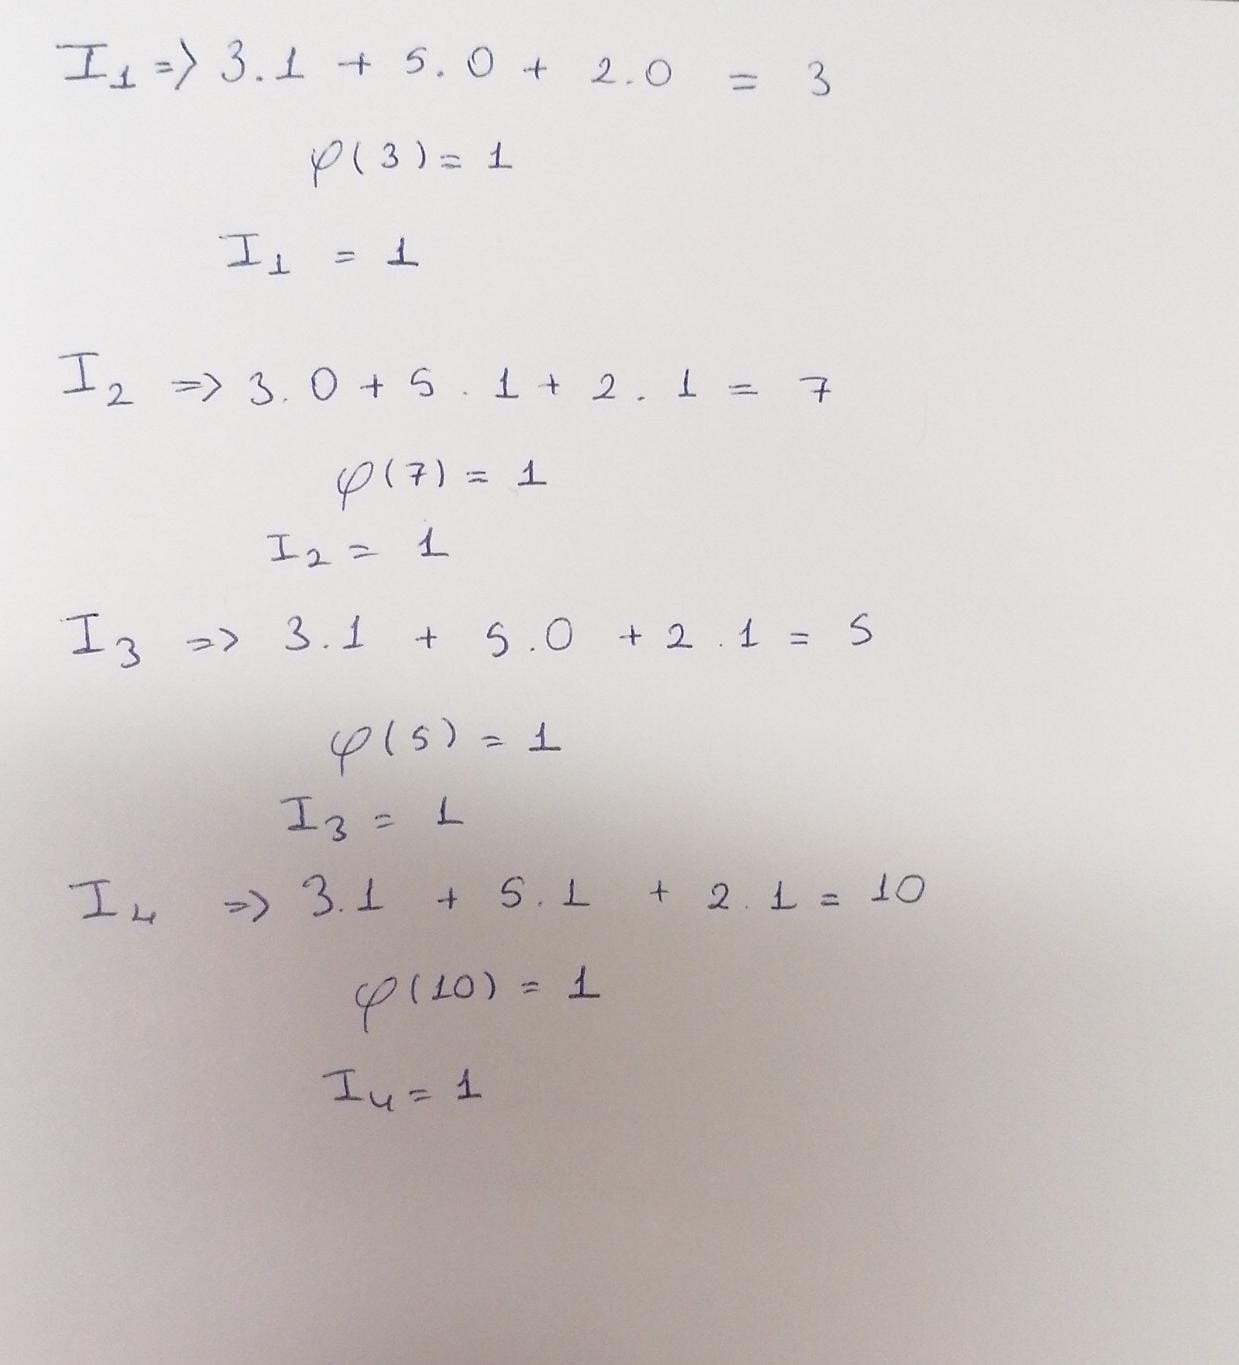

In [6]:
Image(filename='q2.3.jpeg')

**3**. Consider the multi-layer neural network below:


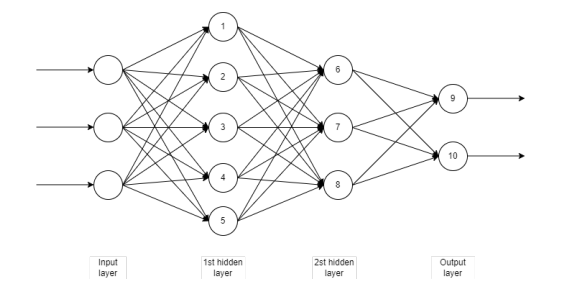

In [7]:
Image(filename='q3.PNG')

• Find how many weight variables the network has in total (Ignore bias values). Show your calculations.
$$ [3X5] + [5X3] + [3X2] $$
$$ 15 + 15 + 6 = 36 $$

• Find how many weight variables the network has in total if the network is considered as fully connected (Ignore bias values). Show your calculations

-- This is a fully connected multi-layer neural network. So weight is same 36. --

• State the dependency information for nodes given number values, which are about which node takes information from which previous node. State also these dependencies for both forward and back-propagation streams.


Nodes 1,2,3,4,5 receive information from all incoming inputs. Likewise 6,7,8 nodes also receive information from nodes 1,2,3,4,5. Nodes 9 and 10 receive information from nodes 6,7,8. Since this neural network is in a fully connected structure, all nodes receive information from all previous nodes. x1,x2,x3 stand for each input node respectively. For node 1 the formula is $$w00x1+w01x2+w02x3$$. wij represent i for previous node number and j for j^m edge of node i connected to the particular node. Similarly we can calculate tha all other forward propogate. Our goal with backpropagation is to update each of the weights in the network so that they cause the actual output to be closer the target output, thereby minimizing the error for each output neuron and the network as a whole. Backpropagation applies the same procedure seen in forward propagation to approximate and spread the weights responsible for the errors. We would like to have the error as small as possible to obtain good performance with the model. This minimization can be reached by finding the right choice of parameters, weights, and biases, using an optimization algorithm called Gradient Descent.

## Part II: Classification of Flower Species using Neural Network


### Dataset Upload


In [8]:
#!pip install opencv-python

Importing necessary libraries before starting the project

In [41]:
import pandas as pd
import os
from PIL import Image, ImageOps
from matplotlib import image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image as img
import os
import numpy as np
import tqdm
import glob
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

Load images function for loading train and test images. Also this function normalize image values (0 − 255) to between 0 and 1

In [42]:
def load_images(path,size):
    folders= os.listdir(path)
    data = []
    label = []
    for i in folders:
        images=os.listdir(path+'/'+i)
        if '.DS_Store' in images:
            images.remove('.DS_Store')
        for j in images:
            img =Image.open(path+'/'+i+'/'+j)
            img = ImageOps.grayscale(img)
            img=img.resize((size,size), image.NEAREST)
            ar=np.array(img)
            ar = ar.astype('float32')
            ar = ar /255
            data.append(ar)
            label.append(i)
    t=pd.factorize(np.array(label))
    tgt=t[0]
    return np.array(data), tgt

In [43]:
def load_train_test(image_size):
    X_train, y_train = load_images('train', image_size)
    X_test, y_test = load_images('test', image_size)
    X_train = X_train.reshape(9800,image_size*image_size)
    X_test = X_test.reshape(1400,image_size*image_size)
    return X_train,y_train,X_test,y_test

 ## Multi Layer Neural Network
                        Formula for Multi Layer Neural Network: $$ Oi = wijxj + bi $$

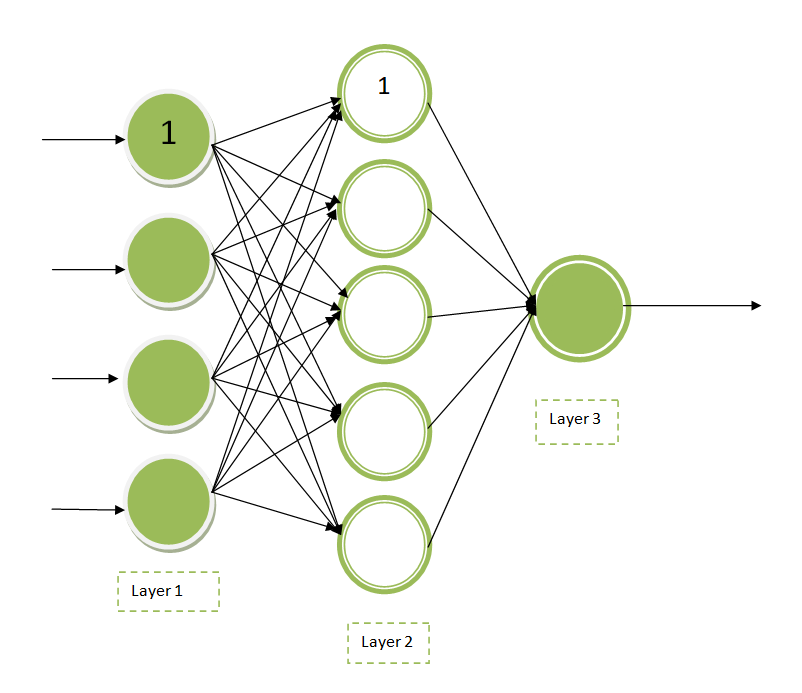

In [12]:
img(filename='multilayer.PNG')

## Image Size = 32x32

Loading the train images as X_train X_test and creating y_train and y_test according to their belonging classes. Flower Species Dataset contains 1600 total images for each flower species and corresponding 7 labels. Reshaping the images for prepare the using in the neural network architectures.

In [13]:
X_train, y_train, X_test, y_test = load_train_test(32)

In [14]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((9800, 1024), (9800,), (1400, 1024), (1400,))

As seen in the above figure a multi layer network consists of one input layer, n hidden layer(s) and one output layer. Following functions help us to build the architecture of Multi Layer Neural Network. sigmoid, relu and softmax functions are using in the forward propagation section which refers to the calculation and storage of intermediate variables (including outputs) for a neural network in order from the input layer to the output layer. Sigmoid function also include it's derivative. loss function for update network parameters w and b to minimize the loss function using gradient descent algorithm.
*-The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities. If one of the inputs is small or negative, the softmax turns it into a small probability, and if an input is large, then it turns it into a large probability, but it will always remain between 0 and 1.*
*-Sigmoid function is normally used to refer specifically to the logistic function, also called the logistic sigmoid function and, have the property that map the entire number line into a small range such as between 0 and 1, or -1 and 1, so one use of a sigmoid function is to convert a real value into one that can be interpreted as a probability. Sigmoid functions can be used as an activation function in an artificial neural network.*
*-The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.*

In [37]:
def sigmoid(x, derivative=False):
    import numpy as np

    if derivative:
        f = x/(1-x)
    else :
        f = 1/(1+ np.exp(-x))
    return f

def ReLU(x):
    f = np.maximum(0, x)
    return f

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def loss(y_predict,y):
    return ((-np.log(y_predict))*y).sum(axis=1).mean()

MultiLayerNN class for creating Multi Layer neural network models with different hidden layers, activation functions, layer sizes. layer function creates the layers according to batch sizes, forward propagation function makes calculation and storage of intermediate variables (including outputs) for a neural network in order from the input layer to the output layer, backward propagation function is using for train a neural network. And class contains train and predict functions as every algorithm in machine learning for tarining a model and making predictions.


In [38]:
class MultiLayerNN():

    def __init__(self,activation_function,X_test,layer_num=1,layer_size=128):
        self.layer_num = layer_num
        self.layer_size = layer_size
        self.weights = []
        self.batch_size = 0
        self.hidden = []
        self.out = 0
        self.layer_sizes = []
        self.X_test = np.concatenate((X_test,np.ones((X_test.shape[0],1))),axis=1)
        self.layer_c = 0
        self.activation_function = activation_function

    def layers(self,batch_size):
        self.hidden = [np.empty((batch_size,layer)) for layer in self.layer_sizes]


    def forward_propagations(self,batch):
        hidden_layer = batch
        self.hidden[0] = hidden_layer
        for i,weights in enumerate(self.weights):
            if self.activation_function == "sigmoid":
                hidden_layer = sigmoid(hidden_layer.dot(weights))
            else:
                hidden_layer = ReLU(hidden_layer.dot(weights))

            self.hidden[i+1]=hidden_layer
        self.out = softmax(self.hidden[-1])


    def backward_propagations(self,batch_y,learning_rate):
        delta = (self.out- batch_y)*((self.hidden[-1])*(1-self.hidden[-1]))
        for i in range(1,len(self.weights)+1):
            self.weights[-i]-=learning_rate*(self.hidden[-i-1].T.dot(delta))/self.batch_size
            delta = ((self.hidden[-i-1])* (1-self.hidden[-i-1]))*(delta.dot(self.weights[-i].T))

    def train(self,X_train,y_train,batch_size,epochs,learning_rate):
        X_train = np.concatenate((X_train,np.ones((X_train.shape[0],1))),axis=1)
        y_train = np.squeeze(np.eye(10)[y_train.astype(int).reshape(-1)])
        self.layer_c = y_train.shape[1]
        self.layer_sizes = np.array([X_train.shape[1]] + [self.layer_size] * self.layer_num + [y_train.shape[1]])
        for i in range(self.layer_sizes.shape[0]-1):
            self.weights.append(np.random.uniform(-1,1,size=[self.layer_sizes[i],self.layer_sizes[i+1]]))
        self.weights = np.asarray(self.weights,dtype=object)
        self.batch_size=batch_size
        for epoch in range(0,epochs):
            self.layers(self.batch_size)
            shuffled = np.random.permutation(X_train.shape[0])
            batch_X = np.array_split(X_train[shuffled],X_train.shape[0]/self.batch_size)
            batch_Y = np.array_split(y_train[shuffled],X_train.shape[0]/self.batch_size)
            for batch_x,batch_y in zip(batch_X,batch_Y):
                self.forward_propagations(batch_x)
                self.backward_propagations(batch_y,learning_rate)
            self.layers(self.X_test.shape[0])
            self.forward_propagations(self.X_test)

    def predict(self,X):
        shape = X.shape[0]
        X = np.concatenate((X,np.ones((shape,1))),axis=1)
        self.layers(shape)
        self.forward_propagations(X)
        categorical = np.zeros((self.out.shape[0],self.layer_c))
        cat_const = np.arange(self.out.shape[0]),self.out.argmax(axis=1)
        categorical[cat_const] = 1
        return categorical

Accuracy functions to compare the predictions and actual values in the test set and calculate what percentage of the predictions are correct.

In [39]:
def accuracy(y_test, predictions):
    counter = 0
    for i in range(0,len(predictions)):
        if y_test[i] == predictions[i]:
            counter = counter + 1
    accuracy = counter / len(predictions)
    return accuracy*100

In [40]:
def calculate_accuracy(predict,test_y):
    predictions = []
    for i in range(0,len(predict)):
        for j in range(0,7):
            if predict[i][j] == 1:
                predictions.append(j)
    accuracy_result = accuracy(test_y,predictions)
    return accuracy_result

create_MultiLayerNN_models function to create multiple models with different parameters and print the accuracy values with the corresponding parameter values.

In [27]:
def create_MultiLayerNN_models(layer_num,layer_size,epoch,train_x,train_y,test_x,test_y):
    # learning_rates = [0.0005,0.001,0.002] updated for the last experiments
    learning_rates = [0.005,0.01,0.02]
    batch_sizes = [16,32,64,128]
    activation_functions=["sigmoid","ReLU"]
    counter = 1
    for activation_function in activation_functions:
        for batch_size in batch_sizes:
            for learning_rate in learning_rates:
                try:
                    model = MultiLayerNN(activation_function,test_x,layer_num=layer_num,layer_size=layer_size)
                    model.train(train_x,train_y,batch_size=batch_size,epochs=epoch,learning_rate=learning_rate)
                    predict = model.predict(test_x)
                    accuracy_score = calculate_accuracy(predict,test_y)
                    list_of_accuracy.append(accuracy_score)
                    print(counter,". ","Model accuracy is %", "{:.2f}".format(accuracy_score),"with activation function:",activation_function,"batch size:",batch_size,"learning rate",learning_rate)
                    counter = counter + 1
                except:
                    continue


## Models Contain One Hidden Layer

In this assignment we should implement 4 architecture in total. One of them is Multi Layer Neural Network with one hidden layer. This architecture is build by give the layer number parameter as 1. And with changing the other parameters like activation function, batch size and learning rate created 24 different models.

In [20]:
#list of accuracy list for plotting
list_of_accuracy = []
epoch = 50

Each of the following models was created with different parameters. In order to understand which parameters are different, the values of each parameter that are different in the output are also suppressed. You can also examine the accuracy results of different values from the table created at the end.

In [251]:
create_MultiLayerNN_models(1,128,epoch,X_train,y_train,X_test,y_test)

1 .  Model accuracy is % 13.04 with activation function: sigmoid batch size: 16 learning rate 0.0005
2 .  Model accuracy is % 13.79 with activation function: sigmoid batch size: 16 learning rate 0.001
3 .  Model accuracy is % 16.71 with activation function: sigmoid batch size: 16 learning rate 0.002
4 .  Model accuracy is % 14.42 with activation function: sigmoid batch size: 32 learning rate 0.0005
5 .  Model accuracy is % 14.94 with activation function: sigmoid batch size: 32 learning rate 0.001
6 .  Model accuracy is % 10.93 with activation function: sigmoid batch size: 32 learning rate 0.002
7 .  Model accuracy is % 15.36 with activation function: sigmoid batch size: 64 learning rate 0.0005
8 .  Model accuracy is % 14.96 with activation function: sigmoid batch size: 64 learning rate 0.001
9 .  Model accuracy is % 17.96 with activation function: sigmoid batch size: 64 learning rate 0.002
10 .  Model accuracy is % 16.57 with activation function: sigmoid batch size: 128 learning rate 0

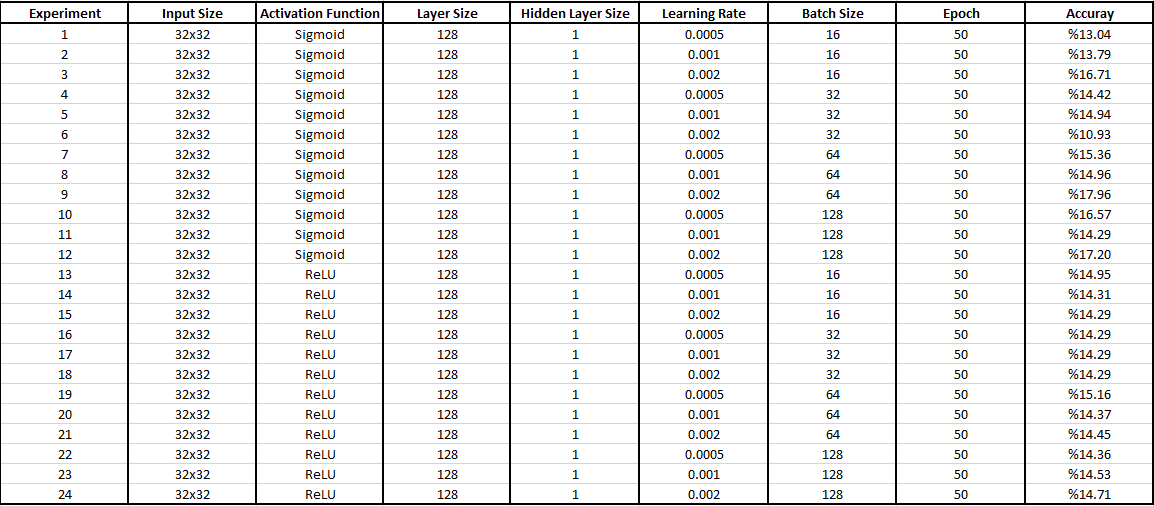

In [30]:
img(filename='ML-32X32.PNG')

Here we observe 24 different models and 24 different accuracy values. Although we consider the data consisting of images with 32x32 size, it is possible to say that the accuracy values are quite low. However, if we make a comparison, if we look at the best accuracy value and then the model that follows it, we can see that the learning rate parameter is 0.002. Although it is not included in the table here, I have done different experiments with different learning rate values before that. As I observed that the accuracy values were fixed to a single value in the ReLU activation function when I took 0.05-0.02 as the example given in the pdf, I reduced the accuracy values to be in the range of 0.0005-0.002. Likewise, we observe that higher batch size gives higher accuracy. As an example, we can give an example of models 1, 4, and 7, where we increase the value of the batch size while the learning rate and activation function are stable. It is also clear that it would be better to use sigmoid for the Activation function.

## Models Contain Two Hidden Layer

One of the architecture as implemented in this assignment is Multi Layer Neural Network with two hidden layer. This architecture is build by give the layer number parameter as 2. And with changing the other parameters like activation function, batch size and learning rate created 24 different models.

In [253]:
create_MultiLayerNN_models(2,128,epoch,X_train,y_train,X_test,y_test)

1 .  Model accuracy is % 2.90 with activation function: sigmoid batch size: 16 learning rate 0.0005
2 .  Model accuracy is % 13.71 with activation function: sigmoid batch size: 16 learning rate 0.001
3 .  Model accuracy is % 15.93 with activation function: sigmoid batch size: 16 learning rate 0.002
4 .  Model accuracy is % 14.29 with activation function: sigmoid batch size: 32 learning rate 0.0005
5 .  Model accuracy is % 14.36 with activation function: sigmoid batch size: 32 learning rate 0.001
6 .  Model accuracy is % 14.50 with activation function: sigmoid batch size: 32 learning rate 0.002
7 .  Model accuracy is % 16.85 with activation function: sigmoid batch size: 64 learning rate 0.0005
8 .  Model accuracy is % 12.96 with activation function: sigmoid batch size: 64 learning rate 0.001
9 .  Model accuracy is % 13.85 with activation function: sigmoid batch size: 64 learning rate 0.002
10 .  Model accuracy is % 95.70 with activation function: sigmoid batch size: 128 learning rate 0.

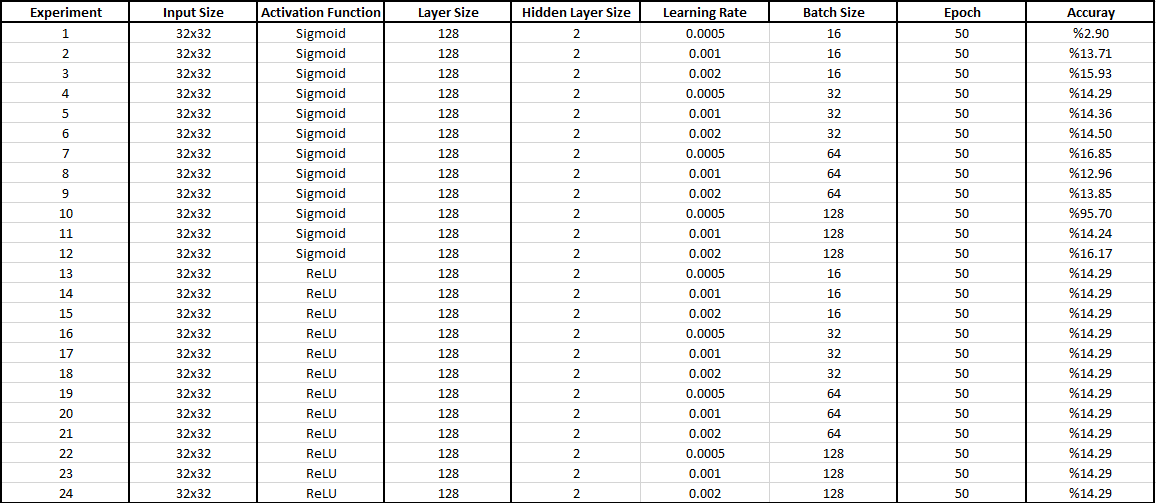

In [31]:
img(filename='ML2-32X32.PNG')

We see that there is a very large range in the models here, and it is not correct to use the same parameters given in the one hidden layer for the two hidden layers. At the same time, we can observe here that the accuracy value remains constant when the ReLU activation function I mentioned before is used. As a result of a few researches I have done, I have come to the conclusion that the reason for this may be the Learning rate parameter. If you want to make observations by creating new models in this way, my suggestion to you would be to play with this parameter. Unfortunately, I will not make further changes and show the difference, since I have carried out many experiments other than the ones seen here and I think that these are the best parameters for generalization, because unfortunately there is a limited time frame given for the assignment. If we need to make a comparison between the more meaningful results, we can say that a lower learning rate value achieves more successful results. Likewise, we see that the most inappropriate value for the batch size value is 16.

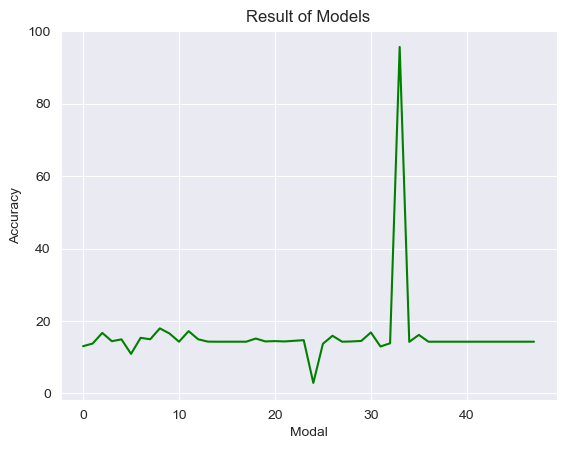

In [257]:
x = range(0,len(list_of_accuracy))
y = list_of_accuracy

plt.plot(x, y,color='g')
plt.xlabel('Modal')
plt.ylabel('Accuracy')
plt.title('Result of Models')
plt.show()


## Image Size = 64x64

Loading the train images as X_train X_test and creating y_train and y_test according to their belonging classes. Flower Species Dataset contains 1600 total images for each flower species and corresponding 7 labels. Also reshaping the images for preparing the Neural Network models.

In [24]:
X_train, y_train, X_test, y_test = load_train_test(64)

In [25]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((9800, 4096), (9800,), (1400, 4096), (1400,))

In [26]:
list_of_accuracy = []
epoch = 50

## Models Contain One Hidden Layer

In [261]:
create_MultiLayerNN_models(1,128,epoch,X_train,y_train,X_test,y_test)

1 .  Model accuracy is % 13.46 with activation function: sigmoid batch size: 16 learning rate 0.0005
2 .  Model accuracy is % 14.21 with activation function: sigmoid batch size: 16 learning rate 0.001
3 .  Model accuracy is % 15.57 with activation function: sigmoid batch size: 16 learning rate 0.002
4 .  Model accuracy is % 13.57 with activation function: sigmoid batch size: 32 learning rate 0.0005
5 .  Model accuracy is % 13.54 with activation function: sigmoid batch size: 32 learning rate 0.001
6 .  Model accuracy is % 19.12 with activation function: sigmoid batch size: 32 learning rate 0.002
7 .  Model accuracy is % 13.48 with activation function: sigmoid batch size: 64 learning rate 0.0005
8 .  Model accuracy is % 19.32 with activation function: sigmoid batch size: 64 learning rate 0.001
9 .  Model accuracy is % 14.97 with activation function: sigmoid batch size: 64 learning rate 0.002
10 .  Model accuracy is % 4.51 with activation function: sigmoid batch size: 128 learning rate 0.

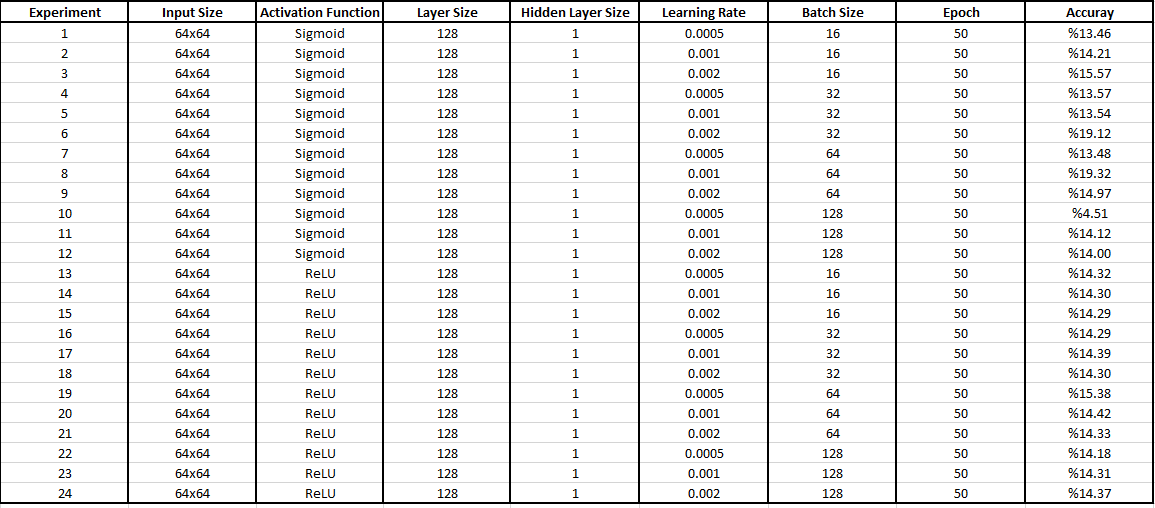

In [32]:
img(filename='ML-64x64.PNG')

The highest accuracy received was 19.32%. When we compare it with 32x32 architecture models, we can say that 64x64 image size is important for higher accuracy. When we compare the 8th model with the highest accuracy value and the 10th model with the lowest accuracy value, we can interpret that the lower batch size value and higher learning rate value for this architecture lead to a positive increase in accuray. ReLU function values did not remain constant this time, but We can observe that the range of values is also close. In fact, I think that a complete comparison would not be correct here, since it is the sigmoid function that gives the worst and the best results.

## Models Contain Two Hidden Layer

We update the learning rate parameters as 0.005, 0.01, 0.02 and the epoch number as 25, since the formation of models in the previous architecture takes a very long time, and we conclude that the given parameters are not very suitable when we interpret the accuracy values.

In [28]:
epoch = 25

In [29]:
create_MultiLayerNN_models(2,128,epoch,X_train,y_train,X_test,y_test)

1 .  Model accuracy is % 13.93 with activation function: sigmoid batch size: 16 learning rate 0.005
2 .  Model accuracy is % 14.11 with activation function: sigmoid batch size: 16 learning rate 0.01
3 .  Model accuracy is % 16.36 with activation function: sigmoid batch size: 16 learning rate 0.02
4 .  Model accuracy is % 14.58 with activation function: sigmoid batch size: 32 learning rate 0.005
5 .  Model accuracy is % 13.86 with activation function: sigmoid batch size: 32 learning rate 0.01
6 .  Model accuracy is % 14.43 with activation function: sigmoid batch size: 32 learning rate 0.02
7 .  Model accuracy is % 33.33 with activation function: sigmoid batch size: 64 learning rate 0.005
8 .  Model accuracy is % 14.07 with activation function: sigmoid batch size: 64 learning rate 0.01
9 .  Model accuracy is % 13.68 with activation function: sigmoid batch size: 64 learning rate 0.02
10 .  Model accuracy is % 14.79 with activation function: sigmoid batch size: 128 learning rate 0.005
11 .

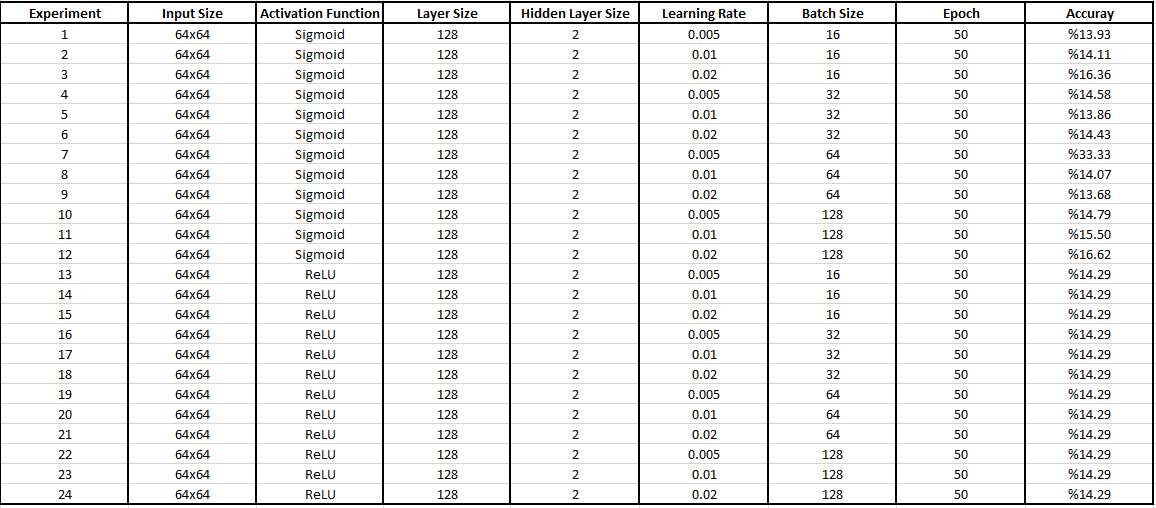

In [33]:
img(filename='ML2-64x64.PNG')

If the learning I mentioned above is too big for you, I have thus shown that the accuracy remains constant when the ReLU activation function is used. However, as it was noticed, our best model, which has the highest accuracy until now, was formed with these parameters. We can observe that the sigmoid function is much more optimal this time, and the learning rate and batch size parameters give different results at different values.

Graph for the last architecture for compare models according to accuracy values

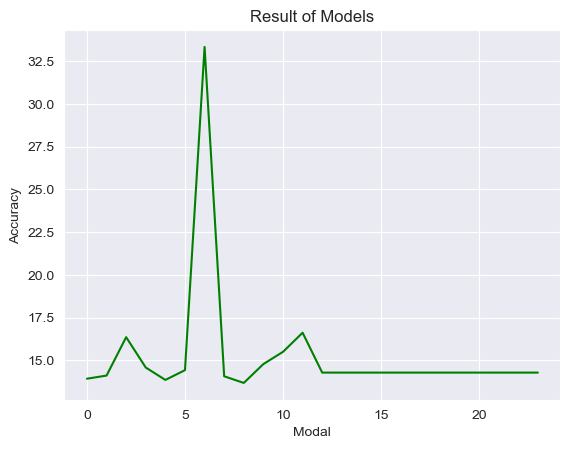

In [71]:
x = range(0,len(list_of_accuracy))
y = list_of_accuracy

plt.plot(x, y,color='g')
plt.xlabel('Modal')
plt.ylabel('Accuracy')
plt.title('Result of Models')
plt.show()

*Since I do not want to limit myself to the values given in the pdf and of course I want to get full points, let's try the model that gives the highest accuracy and that we define as the best model with different parameters (parameters that we did not change while trying in architecture) and observe the results. Thus, we can be even more confident that we have found the ideal parameters of this model.*

In [37]:
model = MultiLayerNN("sigmoid",X_test,layer_num=2,layer_size=64)
model.train(X_train,y_train,batch_size=64,epochs=25,learning_rate=0.005)
predict = model.predict(X_test)
calculate_accuracy(predict,y_test)

15.19756838905775

In [38]:
model = MultiLayerNN("sigmoid",X_test,layer_num=2,layer_size=32)
model.train(X_train,y_train,batch_size=64,epochs=25,learning_rate=0.005)
predict = model.predict(X_test)
calculate_accuracy(predict,y_test)

17.42857142857143

In [39]:
model = MultiLayerNN("sigmoid",X_test,layer_num=2,layer_size=32)
model.train(X_train,y_train,batch_size=64,epochs=50,learning_rate=0.005)
predict = model.predict(X_test)
calculate_accuracy(predict,y_test)

15.357142857142858

In [41]:
model = MultiLayerNN("sigmoid",X_test,layer_num=2,layer_size=32)
model.train(X_train,y_train,batch_size=64,epochs=25,learning_rate=0.0005)
predict = model.predict(X_test)
calculate_accuracy(predict,y_test)

14.714285714285714

All results infer lower accuracy than the accuracy of our best model. In the results between these, we can say that we reach a relatively better accuracy value when we set the layer size value to 32.

As a result, 96 different models were created for 32x32 image size and 64x64 image size using 2 different architectures in the Multi Layer Neural Network part. It has been observed that giving the value of 2 as the layer num gives better results than giving the value of 1 and choosing the value of 64 as the image size. It was concluded that the number of epochs also had a significant effect on the resulting accuracy to prevent overfitting of the model.

## Convolutional Neural Network:

Importing necessary libraries before starting to the Convolutional Neural Network part. In this part pytorch will be used.

In [72]:
# !pip install pytorch

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt


import math
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from pytorch_model_summary import summary
from time import time

In this part, 2 new architectures are created for the assignment. The first of these, the SpecialCNN class, contains one convolutional and one fully connected layer. This is a custom class that basically uses a pytorch framework.

## Model with one convolutional and one fully connected layer

In [19]:
class SpecialCNN (nn.Module):

    def __init__(self,image_size):
        super(SpecialCNN, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        ).to(set_device())

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(image_size*image_size*4, 7)
        ).to(set_device())

    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value

Other architecture contains two convolutional two fully connected layer. Both of these classes I set the parameter values of the layers. I choose 3 as the kernel size, 1 as the padding value. I build these architectures according to different image size values. So I can say my implementation is reproducible.

## Model with two convolutional and two fully connected layer

In [20]:
class SpecialCNN2(nn.Module):

    def __init__(self,image_size):
        super(SpecialCNN2, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),                      #1 conv
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),                      #1 conv
            nn.MaxPool2d(2, 2)
        ).to(set_device())

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(image_size*image_size*2, 16),

            nn.ReLU(),

            nn.Flatten(),
            nn.Linear(16, 7),
        ).to(set_device())

    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value

Function for setting the device as cuda if it is available.

In [21]:
def set_device():
    device=None
    if torch.cuda.is_available():
        device = torch.device("cuda")
    else:
        device = torch.device("cpu")
    return device

This function is used for defining the transforms for loading the image dataset.

In [22]:
def define_transforms(image_size):
    transform = transforms.Compose(
        [
            transforms.Resize((image_size, image_size)),
            transforms.RandomRotation(20),          # rotating images 20 degree randomly
            transforms.RandomHorizontalFlip(),
            transforms.ColorJitter(0.1,0.1,0.1),    # this section is about saturation brightness vs.
            transforms.ToTensor(),
            transforms.Normalize([0.554, 0.450, 0.343],[0.231, 0.241, 0.241]),
            transforms.RandomErasing()              # randomly erasing pixels
        ]
    )
    return transform

I created a data loader function for loading the data without written same things many times. This functiom using the DataLoader.

In [23]:
def data_loader(batchSize, dataset):
    Data = DataLoader(
        dataset=dataset,
        batch_size=batchSize,
        shuffle=True,
        num_workers=2
    )
    return Data

Function for initializing the models according to CNN model or saved model. In this assignment this functions only be used for CNN models. There are two different function for two different architecture.

In [24]:
def initialize_model(CNN, device, path, learningRate,image_size):
    model = None
    if CNN:
        model = SpecialCNN(image_size).to(device)
    else:
        model = torch.load(path, map_location=device)

    optimizer = optim.Adam(model.parameters(), lr=learningRate)
    return model, optimizer

In [25]:
def initialize_model2(CNN, device, path, learningRate,image_size):
    model = None
    if CNN:
        model = SpecialCNN2(image_size).to(device)
    else:
        model = torch.load(path, map_location=device)

    optimizer = optim.Adam(model.parameters(), lr=learningRate)
    return model, optimizer

train function to training the neural network. It calculate a loss for each batch and then with using backward function changes the weights for optimal solution.

In [26]:
def train(model, trainData, criterion, device, optimizer):

    total_loss = 0
    accuracy = []

    for i, batch in enumerate(trainData, 1):

        model_input = batch[0].to(device)
        target = batch[1].to(device)
        model_output = model(model_input)

        loss = criterion(model_output, target)
        total_loss = total_loss + loss.item()

        optimizer.zero_grad()
        loss.backward()

        # updating model parameters
        optimizer.step()

        argmax = model_output.argmax(dim=1)

        # calculating accuracy by comparing to target
        accuracy.append((target == argmax).sum().item() / target.shape[0])

    return total_loss / len(trainData), sum(accuracy) / len(accuracy)

test function for testing the neural network success. It finds the accuracy of the batch by comparing it with actual targets. And returning the average Testing Loss and Accuracy.

In [27]:
def test(epoch, model, epochBased, testData, criterion, device):
    total_loss = 0
    start = time()

    accuracy = []

    with torch.no_grad():
        for i, batch in enumerate(testData):
            minput = batch[0].to(device)
            target = batch[1].to(device)
            # output by our model
            moutput = model(minput)

            loss = criterion(moutput, target)

            total_loss = total_loss + loss.item()

            argmax = moutput.argmax(dim=1)

            accuracy.append((target == argmax).sum().item() / target.shape[0])

    if epochBased:
        print('Epoch: [{}], Test Loss: {:.4f}, Accuracy: {:.2f}, Time: {:.2f} sec'.format(epoch, total_loss / len(testData), sum(accuracy) / len(accuracy), time() - start))

    return total_loss / len(testData), sum(accuracy) / len(accuracy)

This function allows us to call train and test functions as much as the number of epochs, and to keep the loss and accuracy results of each epoch in separate lists.

In [28]:
def epoch_loop(epochNumber, model, trainData, testData, criterion, device, optimizer):
    # main loop
    trainLosses = []
    testLosses = []
    trainAccuracies = []
    testAccuracies = []

    for epoch in range(1, epochNumber + 1):
        trainLoss, trainAccuracy = train(model, trainData, criterion, device, optimizer)
        testLoss, testAccuracy = test(epoch, model, True, testData, criterion, device)
        trainLosses.append(trainLoss)
        testLosses.append(testLoss)
        trainAccuracies.append(trainAccuracy)
        testAccuracies.append(testAccuracy)

    return trainLosses, testLosses, trainAccuracies, testAccuracies

The epoch number value will be used as 10, as I think it is more ideal in this part. I found this number ideal as using more would be very costly in terms of time and I thought it would be insufficient to estimate a lesser number.

In [29]:
epochNumber = 10
device = set_device()

In the continuation of the study, the create_models function is used to obtain a cleaner image instead of writing different models that will be created for each architecture one by one. It takes image size and initialize_model_function to determine which architecture models will be created as parameters. Then, it creates models by using different batch size and learning rate parameters given as a list in different combinations and saves the models. B.Since the learning rate parameter could be a problem (too large - may not converge, too small - too slow convergence), different learning rates were used.

In [30]:
def create_models(image_size,initialize_model_function):
    transform = define_transforms(image_size)
    train_dataset = ImageFolder("train", transform=transform)
    test_dataset = ImageFolder("test", transform=transform)
    learning_rates = [0.0005,0.001,0.002]
    batch_sizes = [16,32,64,128]
    counter = 1
    for batch_size in batch_sizes:
        trainData = data_loader(batch_size, train_dataset)
        testData = data_loader(batch_size, test_dataset)
        for learning_rate in learning_rates:
            model, optimizer = initialize_model_function(True, device, "", learning_rate,image_size)
            print("Model:",counter,"with","batch size:",batch_size,"learing rate:",learning_rate,"objective function:",nn.CrossEntropyLoss())
            trainLosses, testLosses, trainAccuracies, testAccuracies = epoch_loop(epochNumber, model, trainData, testData, nn.CrossEntropyLoss(), device, optimizer)
            np.save(f"acc and loss/loss_test_batch-{batch_size}_lr-{learning_rate}.npy", testLosses)
            np.save(f"acc and loss/loss_train_batch-{batch_size}_lr-{learning_rate}.npy", trainLosses)
            np.save(f"acc and loss/accuracy_test_batch-{batch_size}_lr-{learning_rate}.npy", testAccuracies)
            np.save(f"acc and loss/accuracy_train_batch-{batch_size}_lr-{learning_rate}.npy", trainAccuracies)
            counter = counter + 1

## Models with 32x32 image size and have an architecture of One Convolutional - One Fully Connected Layer

From the moment the models started to form, the increase in accuracy that we noticed very clearly shows that the architectur used was working successfully. A total of 12 different models were created using the SpecialCNN algorithm, which includes one Convolutional one Fully connected layer. You can examine the different epoch results, whose Accuracy values vary between 52% and 67%, from below and then from the table created based on the last epoch value.

In [31]:
create_models(32,initialize_model)

Model: 1 with batch size: 16 learing rate: 0.0005 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 1.2305, Accuracy: 0.56, Time: 3.57 sec
Epoch: [2], Test Loss: 1.1594, Accuracy: 0.59, Time: 3.67 sec
Epoch: [3], Test Loss: 1.1040, Accuracy: 0.60, Time: 3.65 sec
Epoch: [4], Test Loss: 1.1014, Accuracy: 0.60, Time: 3.69 sec
Epoch: [5], Test Loss: 1.0725, Accuracy: 0.63, Time: 3.60 sec
Epoch: [6], Test Loss: 1.0530, Accuracy: 0.63, Time: 3.74 sec
Epoch: [7], Test Loss: 1.0221, Accuracy: 0.64, Time: 3.74 sec
Epoch: [8], Test Loss: 1.0268, Accuracy: 0.64, Time: 3.75 sec
Epoch: [9], Test Loss: 0.9981, Accuracy: 0.65, Time: 3.58 sec
Epoch: [10], Test Loss: 0.9779, Accuracy: 0.66, Time: 3.72 sec
Model: 2 with batch size: 16 learing rate: 0.001 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 1.2043, Accuracy: 0.57, Time: 3.58 sec
Epoch: [2], Test Loss: 1.1415, Accuracy: 0.59, Time: 3.73 sec
Epoch: [3], Test Loss: 1.1045, Accuracy: 0.60, Time: 3.70 sec
Epoch: [4], Test

As can be clearly seen from the table, the model that gave the best result was the 9th model, while the model that gave the worst result was the 10th model. The remarkable thing here is that the only difference between these two models is the learning rate parameter. When the results of the other models are examined, it has been observed that the value of 0.002 is more suitable for the learning rate for the models created using this architecture.

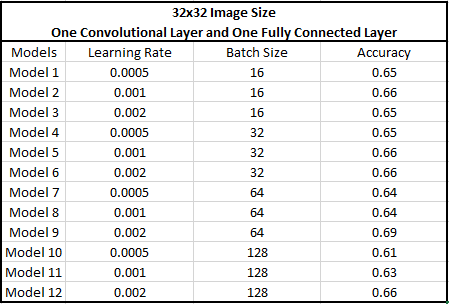

In [32]:
from IPython.display import Image
Image(filename='table1.PNG')

## Models with 64x64 image size and have an architecture of One Convolutional - One Fully Connected Layer

This time, 12 new models are created using the same architecture but with a dataset with 64x64 image size. Again you can observe the accuracy values from the ouput and the table below.

In [41]:
create_models(64,initialize_model)

Model: 1 with batch size: 16 learing rate: 0.0005 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 1.1824, Accuracy: 0.57, Time: 3.62 sec
Epoch: [2], Test Loss: 1.1668, Accuracy: 0.56, Time: 3.82 sec
Epoch: [3], Test Loss: 1.0864, Accuracy: 0.60, Time: 3.54 sec
Epoch: [4], Test Loss: 0.9860, Accuracy: 0.66, Time: 3.58 sec
Epoch: [5], Test Loss: 1.0520, Accuracy: 0.63, Time: 3.64 sec
Epoch: [6], Test Loss: 1.0294, Accuracy: 0.64, Time: 3.56 sec
Epoch: [7], Test Loss: 0.9606, Accuracy: 0.66, Time: 3.64 sec
Epoch: [8], Test Loss: 0.9857, Accuracy: 0.66, Time: 3.53 sec
Epoch: [9], Test Loss: 1.0198, Accuracy: 0.64, Time: 3.54 sec
Epoch: [10], Test Loss: 0.9413, Accuracy: 0.67, Time: 3.67 sec
Model: 2 with batch size: 16 learing rate: 0.001 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 1.1393, Accuracy: 0.61, Time: 3.64 sec
Epoch: [2], Test Loss: 1.1728, Accuracy: 0.61, Time: 3.55 sec
Epoch: [3], Test Loss: 1.1088, Accuracy: 0.62, Time: 3.55 sec
Epoch: [4], Test

Of course, as expected, a larger image had a positive effect on size accuracy and the best accuracy was 69%. Again, if we compare the highest and lowest accuracy values, this time we see the importance of batch size very clearly. Because of the two models that took the value of 0.001 for the learning rate, the model with 16 batch sizes gave better results than the model with 128 batch sizes.

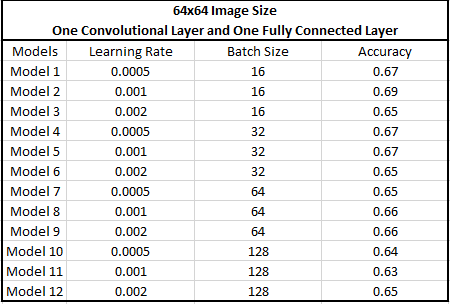

In [33]:
Image(filename='table2.PNG')

## Models with 32x32 image size and have an architecture of Two Convolutional - Two Fully Connected Layer

This time 12 different models were created using the more complex SpecialCNN2 architecture, which includes two convolutional two fully connected layers. The image in the data set used was used in size 32. Again, you can observe the result from the output and table below.

In [29]:
create_models(32,initialize_model2)

Model: 1 with batch size: 16 learing rate: 0.0005 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 1.2122, Accuracy: 0.57, Time: 3.24 sec
Epoch: [2], Test Loss: 1.1339, Accuracy: 0.59, Time: 3.31 sec
Epoch: [3], Test Loss: 1.0679, Accuracy: 0.63, Time: 3.26 sec
Epoch: [4], Test Loss: 1.0372, Accuracy: 0.63, Time: 3.28 sec
Epoch: [5], Test Loss: 1.0300, Accuracy: 0.62, Time: 3.27 sec
Epoch: [6], Test Loss: 0.9922, Accuracy: 0.63, Time: 3.51 sec
Epoch: [7], Test Loss: 0.9904, Accuracy: 0.64, Time: 3.34 sec
Epoch: [8], Test Loss: 0.9720, Accuracy: 0.66, Time: 3.36 sec
Epoch: [9], Test Loss: 0.9710, Accuracy: 0.66, Time: 3.35 sec
Epoch: [10], Test Loss: 0.9571, Accuracy: 0.67, Time: 3.47 sec
Model: 2 with batch size: 16 learing rate: 0.001 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 1.2251, Accuracy: 0.55, Time: 3.43 sec
Epoch: [2], Test Loss: 1.0823, Accuracy: 0.61, Time: 3.43 sec
Epoch: [3], Test Loss: 1.0295, Accuracy: 0.64, Time: 3.44 sec
Epoch: [4], Test

As the complexity of the models increased, the accuracy results also improved. Good accuracy seen this time is 70%. And this result was seen not once but 3 times in model 3, model 5 and model 6. If we compare it with the lowest accuracy value, we can interpret that the learning rate parameter is not 0.0005 and the lower values of the batch sizes give better results.

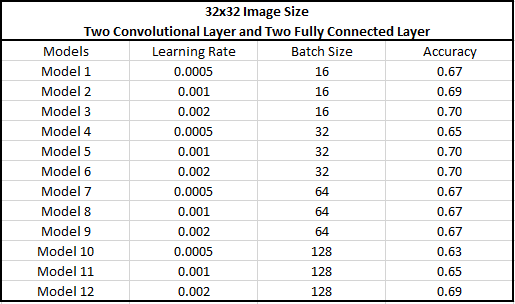

In [34]:
Image(filename='table3.PNG')

## Models with 64x64 image size and have an architecture of Two Convolutional - Two Fully Connected Layer

Using the same architecture and this time choosing image size 64x64, 12 different models were created again.

In [30]:
create_models(64,initialize_model2)

Model: 1 with batch size: 16 learing rate: 0.0005 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 1.2223, Accuracy: 0.55, Time: 3.49 sec
Epoch: [2], Test Loss: 1.1042, Accuracy: 0.60, Time: 3.62 sec
Epoch: [3], Test Loss: 1.0432, Accuracy: 0.61, Time: 3.68 sec
Epoch: [4], Test Loss: 1.0347, Accuracy: 0.62, Time: 3.64 sec
Epoch: [5], Test Loss: 1.0018, Accuracy: 0.63, Time: 3.77 sec
Epoch: [6], Test Loss: 0.9024, Accuracy: 0.68, Time: 3.86 sec
Epoch: [7], Test Loss: 0.9000, Accuracy: 0.68, Time: 4.38 sec
Epoch: [8], Test Loss: 0.9173, Accuracy: 0.67, Time: 3.88 sec
Epoch: [9], Test Loss: 0.8171, Accuracy: 0.72, Time: 4.51 sec
Epoch: [10], Test Loss: 0.8339, Accuracy: 0.70, Time: 3.86 sec
Model: 2 with batch size: 16 learing rate: 0.001 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 1.1770, Accuracy: 0.57, Time: 4.24 sec
Epoch: [2], Test Loss: 0.9991, Accuracy: 0.65, Time: 3.80 sec
Epoch: [3], Test Loss: 0.9493, Accuracy: 0.65, Time: 3.62 sec
Epoch: [4], Test

As predicted, the image size increase had a positive effect on accuracy, and this time the highest accuracy was 73% on two different models. In addition, the accuracy value of a total of 6 models was over 70%. The situation that draws attention in the models with the lowest accuracy values is that the learning rate parameter is 0.0005, which we chose as the smallest. When this value increases, it is seen that the accuracy values of the models also increase. However, according to this table, it is not possible to make a clear interpretation for the batch size because one of the two models with the highest accuracy has a batch size value of 16 while the other is 128. However, it is clear that it would be better to choose the batch size value and the learning rate parameter together.

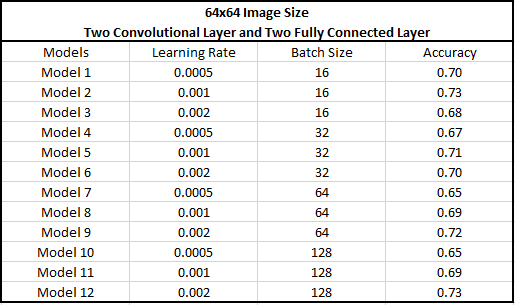

In [35]:
Image(filename='table4.PNG')

In addition, I saved the train and test accuracy and loss values resulting from each model into a file which name is acc and loss.

In [14]:
def plotting(train, test, text, batch, lr):
    plt.plot(range(1, len(train)+1), train, 'r', label="Train {}".format(text))
    plt.plot(range(1, len(test)+1), test, 'b', label="Test {}".format(text))

    plt.title(f"{batch} Batch and {lr} Learning Rate")
    plt.xlabel('Epoch')
    plt.ylabel(text)
    plt.legend()
    plt.show()

In [15]:
accuracy_test  = np.load("acc and loss/64x64 2-2/accuracy_test_batch-128_lr-0.002.npy")
accuracy_train = np.load("acc and loss/64x64 2-2/accuracy_train_batch-128_lr-0.002.npy")

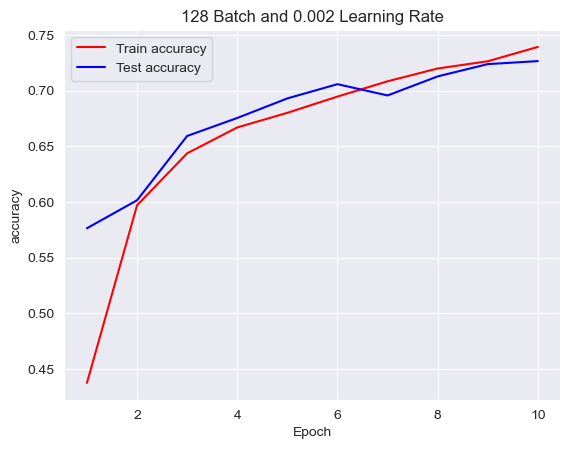

In [16]:
plotting(accuracy_train,accuracy_test,"accuracy",128,0.002)

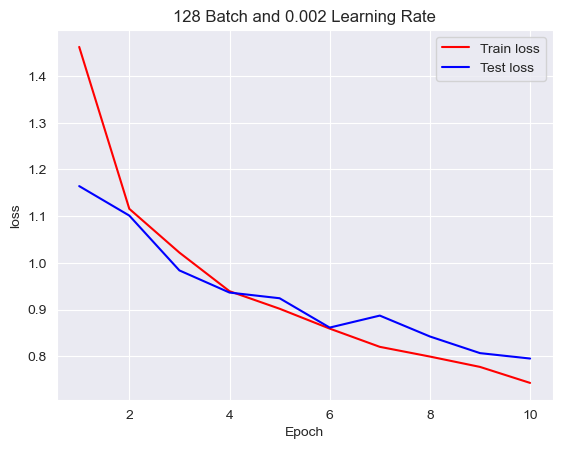

In [17]:
loss_test = np.load("acc and loss/64x64 2-2/loss_test_batch-128_lr-0.002.npy")
loss_train = np.load("acc and loss/64x64 2-2/loss_train_batch-128_lr-0.002.npy")
plotting(loss_train, loss_test, "loss", 128, 0.002)

Above are the accuracy and loss graphs of the model that gives the best results. When we examine the Loss graph, we can see that the train and test error values are considered together, so there is no overfit situation. As the number of epochs increases, we can observe that the number of accuracy increases.

In [12]:
class ExtraCNN(nn.Module):
    def __init__(self):
        super(ExtraCNN, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        ).to(device)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 15)
        ).to(device)

    def forward(self, value):
        value = self.model(value)
        value = self.classifier(value)
        return value

I don't want to limit myself to what is given in the assignment and I will create new models with a new architecture using the model parameters that give the best results in order to be able to interpret better. This new ExtraCNN architecture has 5 convolutional and 2 fully connected layers.

In [18]:
image_size = 64
batch_size = 16
transform = define_transforms(image_size)
train_dataset = ImageFolder("train", transform=transform)
test_dataset = ImageFolder("test", transform=transform)
trainData = data_loader(batch_size, train_dataset)
testData = data_loader(batch_size, test_dataset)
model = ExtraCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [19]:
epoch_loop(epochNumber, model, trainData, testData, nn.CrossEntropyLoss(), device, optimizer)

Epoch: [1], Test Loss: 1.0433, Accuracy: 0.60, Time: 4.10 sec
Epoch: [2], Test Loss: 0.9759, Accuracy: 0.65, Time: 5.03 sec
Epoch: [3], Test Loss: 0.8674, Accuracy: 0.70, Time: 3.51 sec
Epoch: [4], Test Loss: 0.8384, Accuracy: 0.69, Time: 3.51 sec
Epoch: [5], Test Loss: 0.7992, Accuracy: 0.73, Time: 3.99 sec
Epoch: [6], Test Loss: 0.7465, Accuracy: 0.73, Time: 3.89 sec
Epoch: [7], Test Loss: 0.7453, Accuracy: 0.75, Time: 4.24 sec
Epoch: [8], Test Loss: 0.7238, Accuracy: 0.76, Time: 4.24 sec
Epoch: [9], Test Loss: 0.6852, Accuracy: 0.76, Time: 4.56 sec
Epoch: [10], Test Loss: 0.6687, Accuracy: 0.77, Time: 4.14 sec


As I mentioned in my previous comments, I think that the CNN models to be created for this dataset should have a more complex structure. When we created the ExtraCNN model using the parameter values of one of the two models that gave the best results, the accuracy value we got was 77%. This shows us that making the model more complex, that is, adding extra layers, taking into account the possibility of overfit, can give good results for this assignmnet.

Then, in order to better observe the effect of the parameters, a new model is created using the parameters of the other model with the highest accuracy. Since we have just clearly observed that 64 is more suitable for image size, I keep the image size constant at 64.

In [13]:
image_size = 64
batch_size = 16
transform = define_transforms(image_size)
train_dataset = ImageFolder("train", transform=transform)
test_dataset = ImageFolder("test", transform=transform)
trainData = data_loader(batch_size, train_dataset)
testData = data_loader(batch_size, test_dataset)
model = ExtraCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.002)

In [14]:
trainLosses, testLosses, trainAccuracies, testAccuracies = epoch_loop(epochNumber, model, trainData, testData, nn.CrossEntropyLoss(), device, optimizer)

Epoch: [1], Test Loss: 1.2364, Accuracy: 0.55, Time: 3.96 sec
Epoch: [2], Test Loss: 0.9839, Accuracy: 0.66, Time: 4.22 sec
Epoch: [3], Test Loss: 0.9452, Accuracy: 0.65, Time: 3.53 sec
Epoch: [4], Test Loss: 0.8502, Accuracy: 0.70, Time: 3.99 sec
Epoch: [5], Test Loss: 0.9626, Accuracy: 0.66, Time: 3.63 sec
Epoch: [6], Test Loss: 0.8259, Accuracy: 0.72, Time: 3.67 sec
Epoch: [7], Test Loss: 0.7980, Accuracy: 0.73, Time: 3.43 sec
Epoch: [8], Test Loss: 0.8167, Accuracy: 0.72, Time: 3.43 sec
Epoch: [9], Test Loss: 0.8033, Accuracy: 0.74, Time: 3.75 sec
Epoch: [10], Test Loss: 0.7915, Accuracy: 0.74, Time: 3.66 sec


However, when the results are compared, we observe that increasing the learning rate parameter does not have a positive effect on the results.

### Comparing the Classic Neural Network and the Convolutional Neural Network

It can be clearly said that using Convolutional Neural Network is better than using Multi Layer Neural Network in this assignment due to differences in Accuracy values. Both MLP and CNN can be used for Image classification however MLP takes vector as input and CNN takes tensor as input so CNN can understand spatial relation(relation between nearby pixels of image)between pixels of images better thus for complicated images CNN will perform better than MLP. CNN is designed to work for Images or Videos classification. So MLP is good for simple image classification , CNN is good for complicated image classification. It is also clearly seen that CNN converges faster than the MLP model in terms of epochs. In addition, it is a negative situation that the Multi Layer Neural Network takes too many parameters.

## Conclusion

During this assignment, I created a total of 150 models, including 50 CNNs and 100 Multi Layer Neural Networks. Although the epoch value is higher in Multi Layer Neural Network models, I observed that the accuracy results are much lower than the CNN models. In addition, after the models created, I interpreted the results according to the different parameters used and how the optimal parameters should be. In addition to the four basic architectures, I created different architectures and compared the models by getting results from them. As I have compared above, the CNN algorithm has created more suitable models for this dataset, thanks to the advantages it provides. However, this creation process was very costly in terms of time, even though I was using cuda. While creating a Neural Network, I faced many difficulties and had the opportunity to think about optimal results. However, architectures that can be created in many different structures and different numbers of different parameters showed how difficult it is to reach the optimal solution.

In addition to what I learned, I would like to talk about the difficulties I experienced in this assignment. Especially CNN models took a very long time to form. During this time I had to run some code blocks over and over as my computer froze many times. In addition, I think that we did not get enough information from the lessons to be able to do this homework. For this reason, I tried to scan a lot of sources and learn the subject thoroughly. However, this was hardly possible as we had a limited time and it already took about 2 days for all models to build (unless there were any errors, of course). In fact, as a result of a certain process, it caused huge prejudices on the subject. While it is known that the available resources are scarce, such a restriction has hurt us in many ways. In addition, I would like to say that the explanations in the pdf are not clear at all, and I try very hard to understand what is being asked of us. I hope that in the following years, more instructive, not restrictive, developmental assignments will be given instead of this assignment.

## Bonus

For the bonus part, I ran the CNN archticture code again. I observed that the results I got were better than the accuracy values in this assignment. I think this is because the number of classes in the Chest X-ray dataset is 3. Because in the first assignment, we observed that the dataset contains many pictures from different angles, so it is not a very clean dataset. The creation of the models took less time for this dataset. This is because the dataset contains less data in total. Created 24 different model.

In [31]:
image_size = 64

In [36]:
transform = define_transforms(image_size)
train_dataset = ImageFolder("train-Xray", transform=transform)
test_dataset = ImageFolder("test-Xray", transform=transform)
learning_rates = [0.0005,0.001,0.002]
batch_sizes = [16,32,64,128]
counter = 1
for batch_size in batch_sizes:
    trainData = data_loader(batch_size, train_dataset)
    testData = data_loader(batch_size, test_dataset)
    for learning_rate in learning_rates:
        model, optimizer = initialize_model(True, device, "", learning_rate,image_size)
        print("Model:",counter,"with","batch size:",batch_size,"learing rate:",learning_rate,"objective function:",nn.CrossEntropyLoss())
        trainLosses, testLosses, trainAccuracies, testAccuracies = epoch_loop(epochNumber, model, trainData, testData, nn.CrossEntropyLoss(), device, optimizer)
        counter = counter + 1

Model: 1 with batch size: 16 learing rate: 0.0005 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 0.5207, Accuracy: 0.77, Time: 3.82 sec
Epoch: [2], Test Loss: 0.4797, Accuracy: 0.80, Time: 4.51 sec
Epoch: [3], Test Loss: 0.5039, Accuracy: 0.80, Time: 3.83 sec
Epoch: [4], Test Loss: 0.5634, Accuracy: 0.78, Time: 3.83 sec
Epoch: [5], Test Loss: 0.5526, Accuracy: 0.80, Time: 3.94 sec
Epoch: [6], Test Loss: 0.6129, Accuracy: 0.79, Time: 3.87 sec
Epoch: [7], Test Loss: 0.4492, Accuracy: 0.83, Time: 4.19 sec
Epoch: [8], Test Loss: 0.6457, Accuracy: 0.79, Time: 3.71 sec
Epoch: [9], Test Loss: 0.4468, Accuracy: 0.82, Time: 3.88 sec
Epoch: [10], Test Loss: 0.5750, Accuracy: 0.77, Time: 3.85 sec
Model: 1 with batch size: 16 learing rate: 0.001 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 0.7569, Accuracy: 0.71, Time: 3.82 sec
Epoch: [2], Test Loss: 0.4729, Accuracy: 0.80, Time: 3.77 sec
Epoch: [3], Test Loss: 0.4464, Accuracy: 0.81, Time: 3.80 sec
Epoch: [4], Test

In [35]:
transform = define_transforms(image_size)
train_dataset = ImageFolder("train-Xray", transform=transform)
test_dataset = ImageFolder("test-Xray", transform=transform)
learing_rates = [0.0005,0.001,0.002]
batch_sizes = [16,32,64,128]
counter = 1
for batch_size in batch_sizes:
    trainData = data_loader(batch_size, train_dataset)
    testData = data_loader(batch_size, test_dataset)
    for learing_rate in learing_rates:
        model, optimizer = initialize_model2(True, device, "", learing_rate,image_size)
        print("Model:",counter,"with","batch size:",batch_size,"learing rate:",learing_rate,"objective function:",nn.CrossEntropyLoss())
        trainLosses, testLosses, trainAccuracies, testAccuracies = epoch_loop(epochNumber, model, trainData, testData, nn.CrossEntropyLoss(), device, optimizer)
        counter = counter + 1

Model: 1 with batch size: 16 learing rate: 0.0005 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 0.6877, Accuracy: 0.78, Time: 4.18 sec
Epoch: [2], Test Loss: 0.5785, Accuracy: 0.75, Time: 4.09 sec
Epoch: [3], Test Loss: 0.4625, Accuracy: 0.80, Time: 3.80 sec
Epoch: [4], Test Loss: 0.5563, Accuracy: 0.78, Time: 3.72 sec
Epoch: [5], Test Loss: 0.5535, Accuracy: 0.75, Time: 4.05 sec
Epoch: [6], Test Loss: 0.4788, Accuracy: 0.80, Time: 3.64 sec
Epoch: [7], Test Loss: 0.4879, Accuracy: 0.80, Time: 3.81 sec
Epoch: [8], Test Loss: 0.4502, Accuracy: 0.82, Time: 3.66 sec
Epoch: [9], Test Loss: 0.5030, Accuracy: 0.81, Time: 3.71 sec
Epoch: [10], Test Loss: 0.5554, Accuracy: 0.81, Time: 3.72 sec
Model: 2 with batch size: 16 learing rate: 0.001 objective function: CrossEntropyLoss()
Epoch: [1], Test Loss: 0.4917, Accuracy: 0.78, Time: 3.64 sec
Epoch: [2], Test Loss: 0.5180, Accuracy: 0.79, Time: 4.26 sec
Epoch: [3], Test Loss: 0.8516, Accuracy: 0.74, Time: 3.84 sec
Epoch: [4], Test